In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("User_data.csv")
x = dataset.iloc[:, [2, 3]].values 
y = dataset.iloc[:, 4].values
dataset.head()

,user ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
x = dataset.iloc[:, [2, 3]].values 
y = dataset.iloc[:, 4].values
x,y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64))

In [8]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.25, random_state=0)

In [9]:
xtrain, xtest, ytrain, ytest

(array([[    19,  76000],
        [    26,  43000],
        [    47,  25000],
        [    45,  26000],
        [    35,  65000],
        [    32, 150000],
        [    32,  18000],
        [    26,  52000],
        [    27,  57000],
        [    19,  19000],
        [    27,  58000],
        [    29,  80000],
        [    20,  86000]], dtype=int64),
 array([[   35, 20000],
        [   27, 84000],
        [   25, 33000],
        [   26, 80000],
        [   18, 82000]], dtype=int64),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0], dtype=int64))

[[-1.24115386  0.51737936]
 [-0.41673779 -0.4352204 ]
 [ 2.05651041 -0.95482027]
 [ 1.82096296 -0.92595361]
 [ 0.64322572  0.1998461 ]
 [ 0.28990455  2.65351216]
 [ 0.28990455 -1.15688689]
 [-0.41673779 -0.17542047]
 [-0.29896407 -0.03108717]
 [-1.24115386 -1.12802023]]
Confusion Matrix : 
 [[4 0]
 [1 0]]
Accuracy :  0.8


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


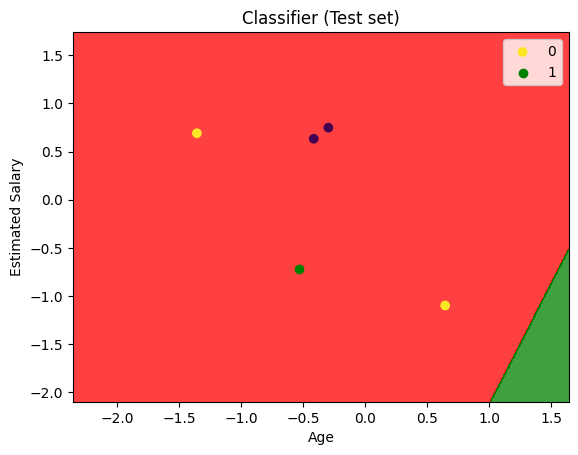

In [10]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 
print (xtrain[0:10, :])
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01)) 


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red',      
            'green'))(i), label = j) 
	
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()
